## 使用语义映射绘制数据子集

>Plotting subsets of data with semantic mappings

``lineplot()``拥有与``relplot()、scatterplot()``类似的灵活性：同样可以借助色调hue、尺寸size和样式style将三种变量展示在二维图表中。因此我们不用停下来思考如何使用matplotlib对点线具体的参数进行设置。

使用``lineplot()``也会诊断数据如何借助语义进行聚合。例如在制图时，加入``色调hue``会将图表分为两条曲线以及错误带（error band），每种颜色对应的指示出数据的子集：

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

#让jupyter notebook的Cell可以将多个变量显示出来。
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

sns.set(style="darkgrid")

## 色调hue
下面我们看看hue具体例子

,subject,timepoint,event,region,signal
844,s10,15,cue,parietal,-0.008887
579,s5,14,cue,frontal,-0.017213
752,s2,6,cue,parietal,-0.046841
640,s10,4,cue,frontal,-0.004133
835,s5,16,cue,parietal,0.016005


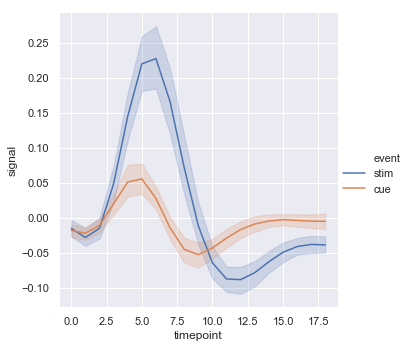

In [21]:
fmri = pd.read_csv('fmri.csv')
fmri.sample(5)

sns.relplot(x='timepoint',
            y = 'signal',
            hue='event',
            kind='line',
            data=fmri)

## 样式style
改变制图中的样式

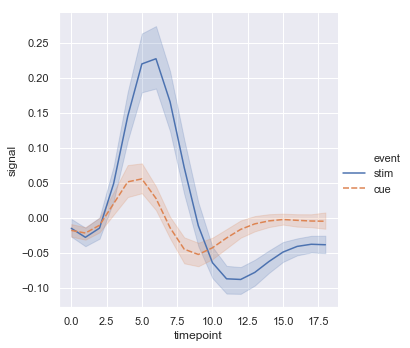

In [10]:
sns.relplot(x='timepoint',
            y = 'signal',
            hue='event',
            style='event',
            kind='line',
            data=fmri)

注意上面代码中hue和style参数都是一个变量，所以绘制的图与之前生成的图变动不大。只是cue类曲线从实线变成虚线。

现在hue和style参数不同后，我们在运行试试

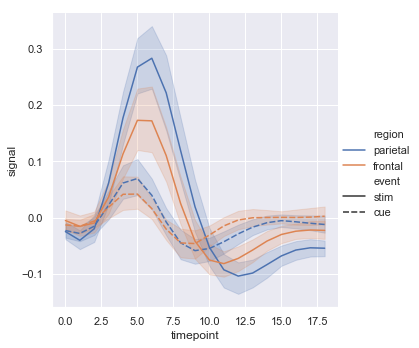

In [11]:
sns.relplot(x='timepoint',
            y = 'signal',
            hue='region',
            style='event',
            kind='line',
            data=fmri)

与散点图一样，要谨慎使用多个语义制作线图。 虽然这样操作有时候提供了信息，但图表更难解读。 但即使您只检查一个附加变量的变化，更改线条的颜色和样式也很有用。 当打印成黑白或有色盲的人观看时，这可以使情节更容易理解：

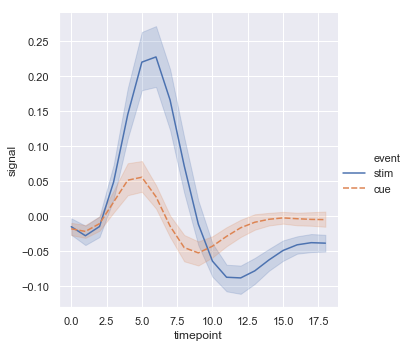

In [12]:
sns.relplot(x='timepoint',
            y = 'signal',
            hue='event',
            style='event',
            kind='line',
            data=fmri)

## units
When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:

当您使用重复测量数据（即，您有多次采样的单位）时，您还可以单独绘制每个采样单位，而无需通过语义区分它们。这可以避免使图例混乱：

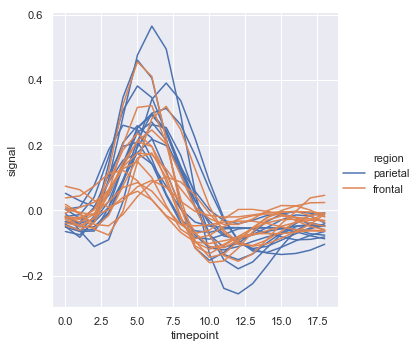

In [19]:
sns.relplot(x="timepoint", 
            y="signal", 
            hue="region",
            units="subject", 
            estimator=None,
            kind="line", 
            data=fmri.query("event == 'stim'"))

lineplot（）中默认的色彩映射和图例处理还取决于``色调hue``是``分类型数据``还是``数字型数据``：

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


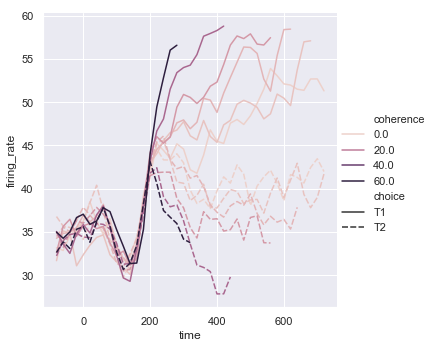

In [27]:
dots = pd.read_csv('dots.csv').query("align == 'dots'")
dots.head()

sns.relplot(x="time", 
            y="firing_rate",
            hue="coherence", 
            style="choice",
            kind="line", 
            data=dots)

## 调色板palette
可能会发生这样的情况：即使色调变量palette是数字，它也很难用线性色标表示。 这就是这种情况，其中色调变量hue以对数方式缩放。 您可以通过传递列表或字典为每一行提供特定的颜色值：

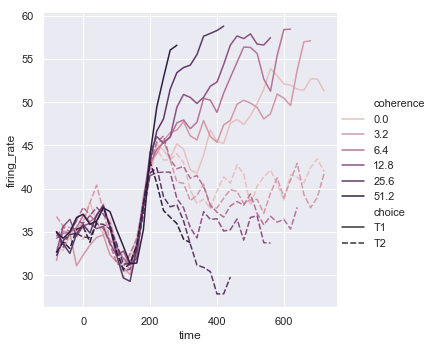

In [44]:
#n_colors值与coherence种类数相等
palette = sns.cubehelix_palette(light=.8, n_colors=6) 

sns.relplot(x="time", 
            y="firing_rate",
            hue="coherence", 
            style="choice",
            palette=palette,
            kind="line", data=dots);

## hue_norm
或者您可以更改色彩映射的规范化方式

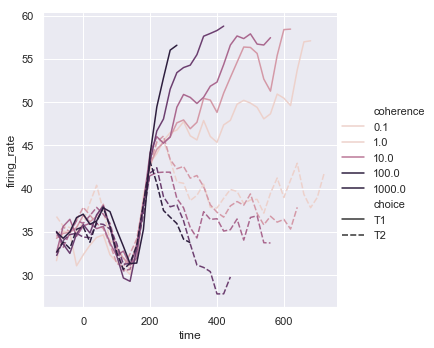

In [47]:
from matplotlib.colors import LogNorm

sns.relplot(x="time", 
            y="firing_rate",
            hue="coherence", 
            hue_norm=LogNorm(),
            style="choice",
            kind="line", 
            data=dots);

## size
改变线条的粗细

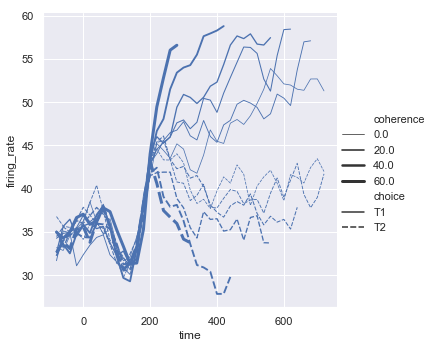

In [48]:
sns.relplot(x='time',
            y='firing_rate',
            size='coherence',
            style='choice',
            kind='line',
            data=dots)

## 绘制date数据

,time,value
0,2017-01-01,0.234358
1,2017-01-02,1.914755
2,2017-01-03,0.731762
3,2017-01-04,0.909735
4,2017-01-05,1.024554


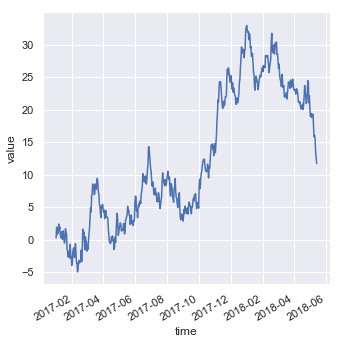

In [56]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
df.head()

g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## 多图展现更多信息
当你想要理解两个变量之间的关系如何依赖于多个其他变量时呢？

最好的方法可能是制作一个以上的图。 因为``relplot（）``基于``FacetGrid``，所以这很容易做到。 要显示新增变量的影响，而不是将其分配给绘图中的一个语义角色，请使用它来“构思”（facet）可视化。 这意味着您可以创建多个轴并在每个轴上绘制数据的子集：

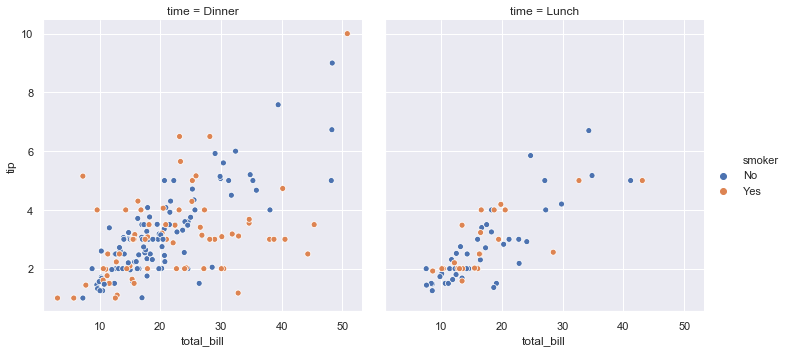

In [57]:
tips = pd.read_csv('tips.csv')

sns.relplot(x="total_bill", 
            y="tip", 
            hue="smoker",
            col="time",  #time有几种值，就有几列图
            data=tips);

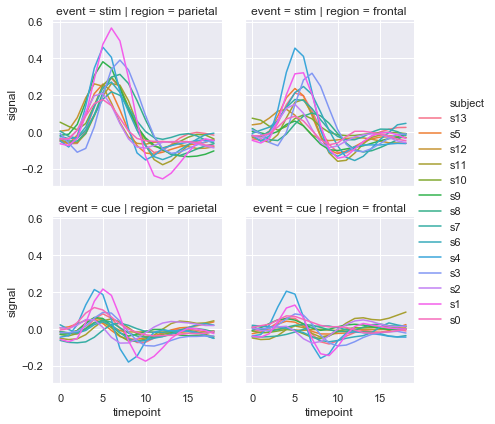

In [58]:
sns.relplot(x="timepoint", 
            y="signal", 
            hue="subject",
            col="region",  #region有几种值，就有几列图
            row="event",  #event有几种值，就有几行图
            height=3,
            kind="line", 
            estimator=None, 
            data=fmri);

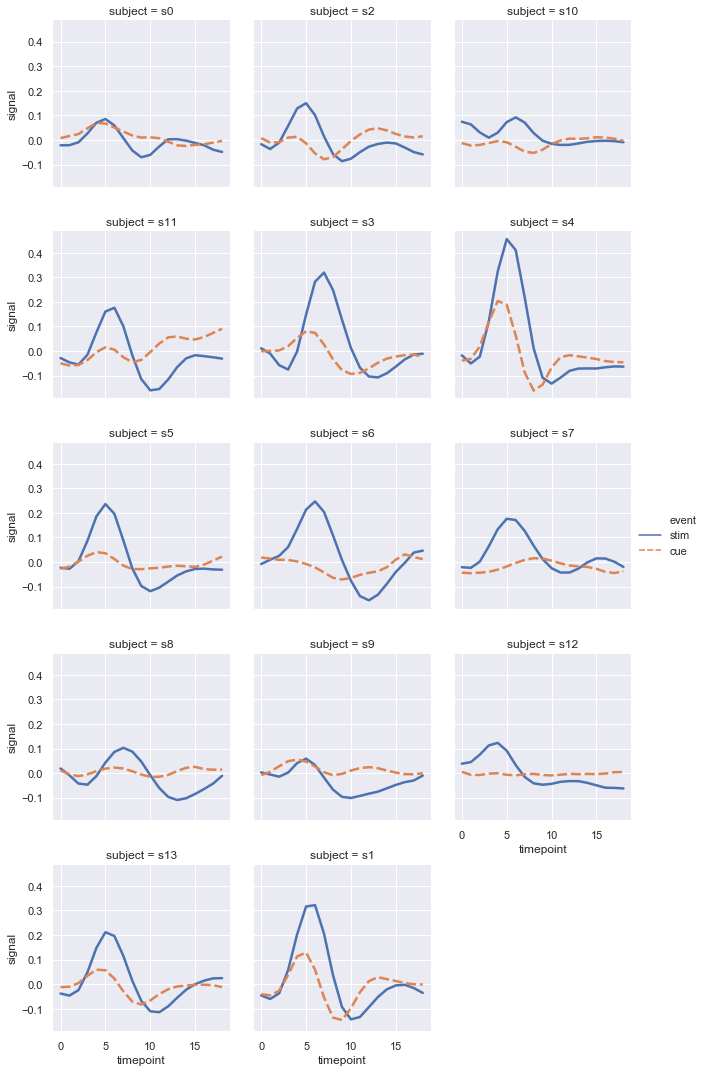

In [65]:
sns.relplot(x="timepoint", 
            y="signal", 
            hue="event", 
            style="event",
            col="subject", 
            col_wrap=3, #显示的图片的行数
            height=3, 
            aspect=1, #长宽比，该值越大图片越方。
            linewidth=2.5,
            kind="line", 
            data=fmri.query("region == 'frontal'"));